In [1]:
%pylab inline
import pandas

Populating the interactive namespace from numpy and matplotlib


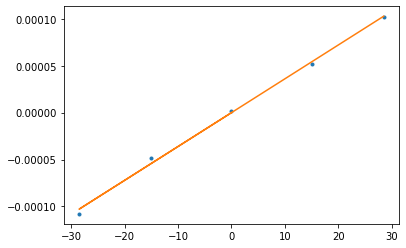

In [6]:
# Étalonnage

df = pandas.read_excel("data.xlsx", sheet_name="etalon")
I_cal = np.ndarray.astype(np.array(df["I2"])[1:-1], float)
B_cal = np.ndarray.astype(np.array(df["B2"])[1:-1], float)*1e-3
a, b = np.polyfit(I_cal, B_cal, 1)

plt.plot(I_cal, B_cal-b,".")
plt.plot(I_cal, a*I_cal)

def B(I):
    return a*I

1.2468576097815826e-05


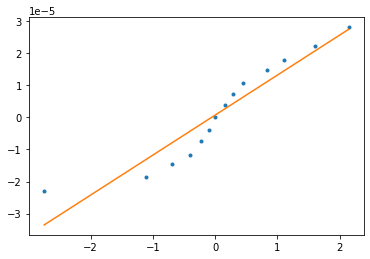

In [7]:
df = pandas.read_excel("data.xlsx", sheet_name="measure")
I     = np.ndarray.astype(np.array(df["I"])[1:], float)
alpha = np.ndarray.astype(np.array(df["alpha"])[1:], float)

y = B(I)
x = np.tan(alpha*np.pi/180)
x.sort()
y.sort()
data = pandas.Series(y, index=x)

portion = data#[-.5:.5] 
x = portion.index
y = portion.values

plt.plot(x, y,".")
Bt, b = np.polyfit(x, y, 1)
plt.plot(x, Bt*x+b)
print(Bt)

# Configuration Helholtz

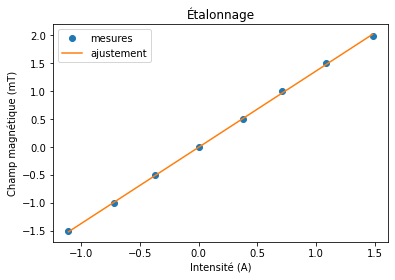

In [4]:
# Étalonnage

df = pandas.read_excel("data.xlsx", sheet_name="Helmholtz_etalon")
I_cal = np.ndarray.astype(np.array(df["I"])[1:], float)
B_cal = np.ndarray.astype(np.array(df["B"])[1:], float)*1e-3
a, b = np.polyfit(I_cal, B_cal, 1)

plt.plot(I_cal, (B_cal-b)*1e3,"o", label="mesures")
plt.plot(I_cal, a*I_cal*1e3, label="ajustement")
plt.xlabel("Intensité (A)")
plt.ylabel("Champ magnétique (mT)")
plt.legend()
plt.title("Étalonnage")

def B(I):
    return a*I

0.018414629628110298


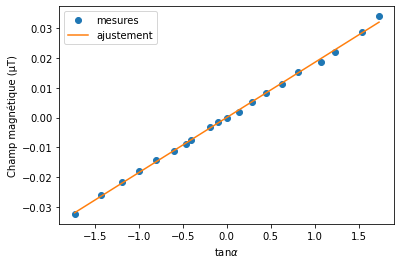

In [9]:
df = pandas.read_excel("data.xlsx", sheet_name="Helmholtz_measure")
I     = np.ndarray.astype(np.array(df["I"])[1:], float) * 1e-3
alpha = np.ndarray.astype(np.array(df["alpha"])[1:], float)

y = I
x = np.tan(alpha*np.pi/180)
data = pandas.Series(y, index=x)

portion = data[-2:2] 
x = portion.index
y = portion.values

plt.plot(x, y*1,"o", label="mesures")
Bt, b = np.polyfit(x, y, 1)
plt.plot(x, (Bt*x + b)*1, label="ajustement")
plt.xlabel("$\\tan \\alpha$")
plt.ylabel("Champ magnétique (µT)")
plt.legend()
print(Bt)



In [109]:
Bt / np.cos(65*np.pi/180)

5.949769501213149e-05